Gradio is a Python library that allows data scientists and machine learning practitioners to quickly build and share interactive web applications. It’s perfect for creating model demos, testing workflows, and collaborating with non-technical users through an intuitive interface.

Note: **using gradio with share=True makes your code and model publically available and shares it with gradio.** Make sure that this is what you want, and in particular don't share any data that should remain private or you don't have rights to.

### Section 1
In this section, we'll make sure that your Colab environment is set up to run gradio.

- Run the cell to install gradio and dependencies. If you get a `ModuleNotFoundError`, restart the runtime.
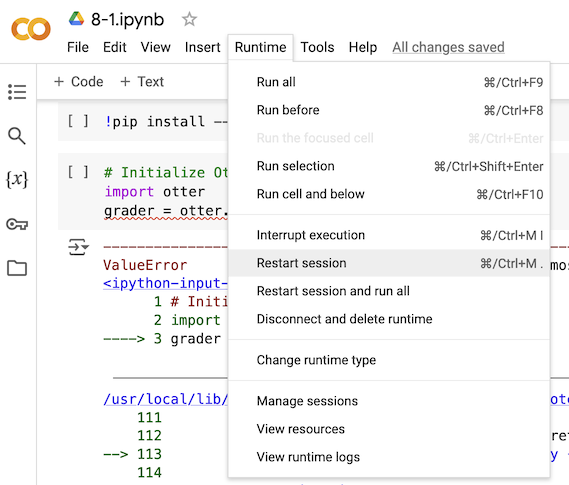
- Define a function which takes in a person's name as a string and returns a friendly greeting to that name
- Check that the function runs in the notebook
- Swap public URLs with another student in the lab, make sure their URL works
- Stop running the cell when you're done by pressing the stop button




In [6]:
!pip install gradio python-multipart

  Using cached gradio_client-1.5.2-py3-none-any.whl.metadata (7.1 kB)
Using cached gradio_client-1.5.2-py3-none-any.whl (320 kB)
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 1.4.1
    Uninstalling gradio_client-1.4.1:
      Successfully uninstalled gradio_client-1.4.1


In [2]:
import gradio

In [5]:
def greet(name):
  output = 'Hello ' + name
  return output

In [6]:
interface = gradio.Interface(
    fn=greet, inputs="text",
    outputs="text",
)

interface.launch(debug=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a28aeede90a38fc624.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Section 2

In this section, we're going to deploy a model which predicts a penguin's species.

In [1]:
import sklearn.ensemble
import seaborn as sns


penguins_df = sns.load_dataset('penguins')

penguins_model = sklearn.ensemble.HistGradientBoostingClassifier(
    categorical_features = ['island', 'sex']
)
penguins_model.fit(
    penguins_df[['island', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex']],
    penguins_df['species']
    )

HistGradientBoostingClassifier(categorical_features=['island', 'sex'])

In [2]:
import pandas as pd

def predict_species(island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex):
  input_series = pd.Series({
      'island': island,
      'bill_length_mm': bill_length_mm,
      'bill_depth_mm': bill_depth_mm,
      'flipper_length_mm': flipper_length_mm,
      'body_mass_g': body_mass_g,
      'sex': sex,
  })
  return penguins_model.predict(input_series.to_frame().transpose())[0]

predict_species('Torgersen', 39.1, 18.7, 181.0, 3750.0, 'Male') # Should return 'Adelie'

'Adelie'

In [9]:
import gradio as gr

In [13]:
# Specify the different values which the island variable can take
island_values = penguins_df['island'].dropna().drop_duplicates().tolist()
# Specify the different values which the sex variable can take
sex_values = penguins_df['sex'].dropna().drop_duplicates().tolist()


# For each of the continous features, construct a gradio slider with min and max
# values set based on the values observed in the dataset

bill_length_slider = gr.Slider(
    minimum=penguins_df['bill_length_mm'].min(),
    maximum=penguins_df['bill_length_mm'].max(),
    step=0.1,
    label='bill_length_mm',
)
bill_depth_slider = gr.Slider(
    minimum=penguins_df['bill_depth_mm'].min(),
    maximum=penguins_df['bill_depth_mm'].max(),
    step=0.1,
    label='bill_depth_mm',
)
flipper_length_slider = gr.Slider(
    minimum=penguins_df['flipper_length_mm'].min(),
    maximum=penguins_df['flipper_length_mm'].max(),
    step=0.1,
    label='flipper_length_mm',
)
body_mass_slider = gr.Slider(
    minimum=penguins_df['body_mass_g'].min(),
    maximum=penguins_df['body_mass_g'].max(),
    step=0.1,
    label='body_mass_g',
)

interface = gr.Interface(
    fn=predict_species,
    inputs=[
        gr.Radio(island_values),
        bill_length_slider, bill_depth_slider, flipper_length_slider, body_mass_slider,
        gr.Radio(sex_values),
        ],
    outputs="text",
)

interface.launch(debug=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e041f293c26a6f2065.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Section 3


Gradio can also make models available via an API so that other services or people can call them. Working with a partner, make a request to each others' gradio instance to predict the species of a penguin.

In [14]:
#  Install the most recent github version of gradio client to deal with an issue
#  You may need to restart your notebook session after doing this
!pip install "git+https://github.com/gradio-app/gradio@36a50769095081a0e77f04f513d47a2e9d4531ba#egg=gradio_client&subdirectory=client/python"

  Cloning https://github.com/gradio-app/gradio (to revision 36a50769095081a0e77f04f513d47a2e9d4531ba) to /tmp/pip-install-d4h0ee2w/gradio-client_71bf854354a14541aaa1d304fcad02b0
  Running command git clone --filter=blob:none --quiet https://github.com/gradio-app/gradio /tmp/pip-install-d4h0ee2w/gradio-client_71bf854354a14541aaa1d304fcad02b0
  Running command git rev-parse -q --verify 'sha^36a50769095081a0e77f04f513d47a2e9d4531ba'
  Running command git fetch -q https://github.com/gradio-app/gradio 36a50769095081a0e77f04f513d47a2e9d4531ba
  Running command git checkout -q 36a50769095081a0e77f04f513d47a2e9d4531ba
  Resolved https://github.com/gradio-app/gradio to commit 36a50769095081a0e77f04f513d47a2e9d4531ba
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 2.6 MB/s eta 0:00:00
  Created wheel for gradio_client: filename=gradio_client-1.4.1-py3-

In [14]:
from gradio_client import Client

url = "https://e041f293c26a6f2065.gradio.live/"

#  The input is a dictionary from the feature names to their value
input = {
    "island": "Torgersen",
    "bill_length_mm": 39.1,
    "bill_depth_mm": 18.7,
    "flipper_length_mm": 181.0,
    "body_mass_g": 3750.0,
    "sex": "Male"
}

client = Client(url)
result = client.predict(
    **input,
		api_name="/predict"
)
print(result)

Loaded as API: https://e041f293c26a6f2065.gradio.live/ ✔
Adelie
